<a href="https://colab.research.google.com/github/amirabehery/AMIT/blob/main/Flowers_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
import os
import glob as gb
import cv2
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import random

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [4]:
os.listdir(data_dir)

['LICENSE.txt', 'tulips', 'sunflowers', 'dandelion', 'daisy', 'roses']

In [5]:
def subfolders(path_to_parent):
     try:
        return next(os.walk(path_to_parent))[1]
     except StopIteration:
        return []

folders = os.listdir(data_dir)
labels = []
for f in folders:
  if not f.endswith('.txt'):
    labels.append(f)

labels

['tulips', 'sunflowers', 'dandelion', 'daisy', 'roses']

In [6]:
def createDictForList(list1):
  list_dict = {}
  for i in range(len(list1)):
    list_dict[list1[i]] = i
  return list_dict


label_dict = createDictForList(labels)
label_dict

{'tulips': 0, 'sunflowers': 1, 'dandelion': 2, 'daisy': 3, 'roses': 4}

In [7]:
paths = []
for label in labels:
  paths.append(data_dir + '/' + label + '/')

paths

['./datasets/flower_photos/tulips/',
 './datasets/flower_photos/sunflowers/',
 './datasets/flower_photos/dandelion/',
 './datasets/flower_photos/daisy/',
 './datasets/flower_photos/roses/']

In [8]:
def readImagesFromFolder(path):
  x_ = []
  y_ = []
  files = gb.glob(pathname = path + '/*.jpg')
  for file in files:
    img = cv2.imread(file)
    img_arr = cv2.resize(img, (100,100))
    x_.append(list(img_arr))
    folder = os.path.split(os.path.dirname(paths[0]))[-1]
    y_.append(label_dict[folder])
  return x_, y_

In [9]:
images_dict = {}
for p in paths:
  folder = os.path.split(os.path.dirname(p))[-1]
  images_dict[folder] = readImagesFromFolder(p)

In [10]:
daisy_images = readImagesFromFolder(paths[0])
len(daisy_images[0]), len(daisy_images[1])

(799, 799)

In [11]:
images_dict.keys(), [len(images_dict[k]) for k, v in images_dict.items()]

(dict_keys(['tulips', 'sunflowers', 'dandelion', 'daisy', 'roses']),
 [2, 2, 2, 2, 2])

In [12]:
len(images_dict['tulips'][0]), len(images_dict['tulips'][1])

(799, 799)

In [13]:
len(images_dict['sunflowers'][0]), len(images_dict['sunflowers'][1])

(699, 699)

In [14]:
X = []
y = []
for i in range(len(labels)):
  X.extend(images_dict[labels[i]][0])
  y.extend(images_dict[labels[i]][1])

In [15]:
len(X), len(y)

(3670, 3670)

In [16]:
def getImageSizesFromFolder(path):
  sizes = []
  if subfolders(path):
    for folder in os.listdir(path):
      files = gb.glob(pathname = path + '/' + folder + '/*.jpg')
      for file in files:
        img = cv2.imread(file)
        sizes.append(img.shape)
  else:
    files = gb.glob(pathname = path + '/*.jpg')
    for file in files:
        img = cv2.imread(file)
        sizes.append(img.shape)
  return pd.Series(sizes).value_counts()

In [17]:
getImageSizesFromFolder(data_dir)

(333, 500, 3)     635
(240, 320, 3)     618
(213, 320, 3)     331
(240, 240, 3)     208
(240, 180, 3)     155
                 ... 
(289, 320, 3)       1
(359, 500, 3)       1
(241, 500, 3)       1
(198, 1024, 3)      1
(264, 500, 3)       1
Length: 345, dtype: int64

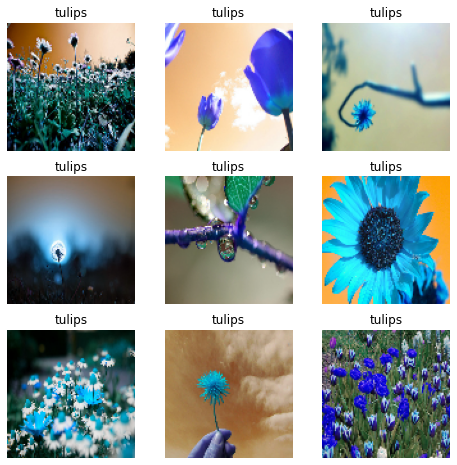

In [18]:
plt.figure(figsize=(8,8))
for n , i in enumerate(list(np.random.randint(0,len(X),9))) : 
    plt.subplot(3,3,n+1)
    plt.imshow(X[i])   
    plt.axis('off')
    plt.title(list(label_dict.keys())[list(label_dict.values()).index(y[i])])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train.shape , x_test.shape , y_train.shape , y_test.shape

((2936, 100, 100, 3), (734, 100, 100, 3), (2936,), (734,))

In [20]:
my_model = keras.models.Sequential([
  keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
  keras.layers.Conv2D(40,kernel_size=(3,3),activation='relu'),
  keras.layers.MaxPool2D(4,4),
  keras.layers.Conv2D(30,kernel_size=(3,3),activation='relu'),
  keras.layers.MaxPool2D(4,4),
  keras.layers.Flatten() ,    
  keras.layers.Dense(20,activation='relu') ,        
  keras.layers.Dropout(rate=0.5) ,            
  keras.layers.Dense(5,activation='softmax') ,    
  ])

my_model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
fitting_process = my_model.fit(x_train, y_train, epochs=10,batch_size=64,verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
46/46 [==============================] - 7s 58ms/step - loss: 2.7692 - accuracy: 0.9125 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
46/46 [==============================] - 2s 37ms/step - loss: 0.3823 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
46/46 [==============================] - 2s 42ms/step - loss: 0.3011 - accuracy: 0.9986 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
46/46 [==============================] - 2s 39ms/step - loss: 0.1834 - accuracy: 0.9997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
46/46 [==============================] - 2s 38ms/step - loss: 0.1699 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
46/46 [==============================] - 2s 37ms/step - loss: 0.1696 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
46/46 [==============================] - 2s 37ms/step - loss: 0.1767 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_ac

In [22]:
loss, accuracy = my_model.evaluate(x_test, y_test)

print(f'Test Loss is {loss}')
print(f'Test Accuracy is {accuracy}')

23/23 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Loss is 0.0
Test Accuracy is 1.0


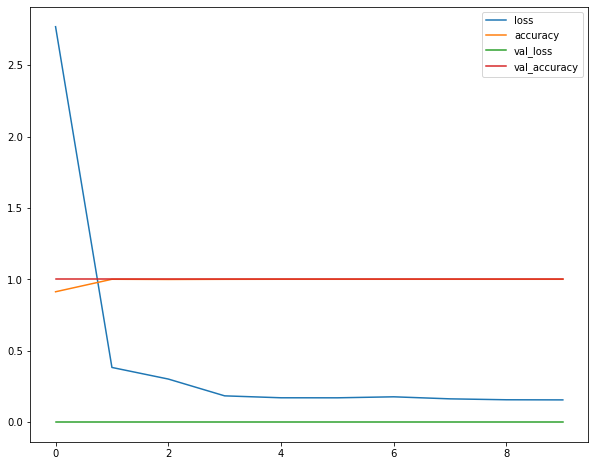

In [23]:
pd.DataFrame(fitting_process.history).plot(figsize=(10,8))
plt.show()

In [24]:
model1 = keras.models.Sequential([
  keras.layers.Conv2D(25,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
  keras.layers.MaxPool2D(2,2),
  keras.layers.Conv2D(13,kernel_size=(3,3),activation='relu'),
  keras.layers.MaxPool2D(2,2),
  keras.layers.Flatten() ,    
  keras.layers.Dense(10,activation='relu') ,        
  # keras.layers.Dropout(rate=0.5) ,            
  keras.layers.Dense(5,activation='softmax') ,    
  ])

model1.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
history1 = model1.fit(x_train, y_train, epochs=3,batch_size=20, validation_data=(x_test, y_test))

Epoch 1/3
147/147 [==============================] - 3s 10ms/step - loss: 0.1272 - accuracy: 0.9942 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/3
147/147 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/3
147/147 [==============================] - 1s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [26]:
loss, accuracy = model1.evaluate(x_test, y_test)

print(f'Test Loss is {loss}')
print(f'Test Accuracy is {accuracy}')

23/23 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Loss is 0.0
Test Accuracy is 1.0


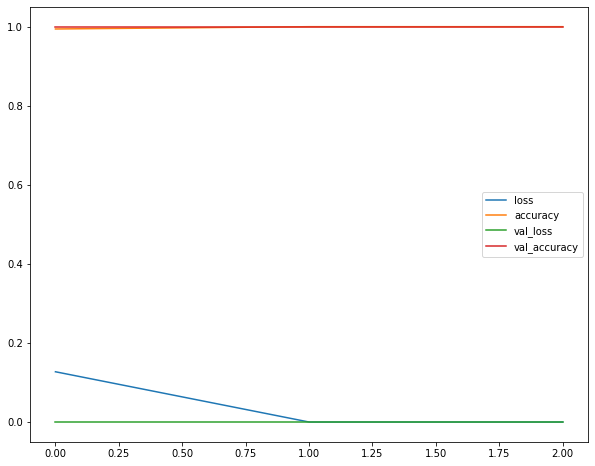

In [27]:
pd.DataFrame(history1.history).plot(figsize=(10,8))
plt.show()

# Image Augmentation

In [28]:
X = np.array(X)
y = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [29]:
x_train = x_train / 255
x_test = x_test / 255

In [31]:
xtrain_gen = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=0.1)
xtest_gen = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=0.1)

xtrain_gen.fit(x_train)
xtrain_gen = xtrain_gen.flow(x_train, y_train)

xtest_gen.fit(x_test)
xtest_gen = xtest_gen.flow(x_test, y_test)

In [32]:
model2 = keras.models.Sequential([
  keras.layers.Conv2D(25,kernel_size=(5,5),activation='relu',input_shape=(100,100,3)),
  keras.layers.MaxPool2D(4,4),
  keras.layers.Conv2D(13,kernel_size=(3,3),activation='relu'),
  keras.layers.MaxPool2D(4,4),
  keras.layers.BatchNormalization(),
  keras.layers.Flatten() ,    
  keras.layers.Dense(10,activation='relu') ,  
  keras.layers.BatchNormalization(),      
  keras.layers.Dropout(rate=0.5) ,            
  keras.layers.Dense(5,activation='softmax') ,    
  ])

model2.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history2 = model2.fit(xtrain_gen, epochs=10, batch_size=20, verbose=1, validation_data= xtest_gen)

Epoch 1/10
92/92 [==============================] - 15s 136ms/step - loss: 1.9432 - accuracy: 0.2718 - val_loss: 1.1270 - val_accuracy: 0.8883
Epoch 2/10
92/92 [==============================] - 10s 104ms/step - loss: 1.4079 - accuracy: 0.4905 - val_loss: 0.9537 - val_accuracy: 0.9332
Epoch 3/10
92/92 [==============================] - 9s 99ms/step - loss: 1.0339 - accuracy: 0.7408 - val_loss: 0.6482 - val_accuracy: 0.9973
Epoch 4/10
92/92 [==============================] - 10s 108ms/step - loss: 0.6865 - accuracy: 0.8927 - val_loss: 0.4549 - val_accuracy: 1.0000
Epoch 5/10
92/92 [==============================] - 13s 137ms/step - loss: 0.4262 - accuracy: 0.9619 - val_loss: 0.2084 - val_accuracy: 1.0000
Epoch 6/10
92/92 [==============================] - 10s 106ms/step - loss: 0.2764 - accuracy: 0.9768 - val_loss: 0.1109 - val_accuracy: 1.0000
Epoch 7/10
92/92 [==============================] - 10s 110ms/step - loss: 0.1854 - accuracy: 0.9854 - val_loss: 0.0625 - val_accuracy: 1.0000
E

In [35]:
loss, accuracy = model2.evaluate(x_test, y_test)

print(f'Test Loss is {loss}')
print(f'Test Accuracy is {accuracy}')

23/23 [==============================] - 0s 6ms/step - loss: 0.0229 - accuracy: 1.0000
Test Loss is 0.022914240136742592
Test Accuracy is 1.0


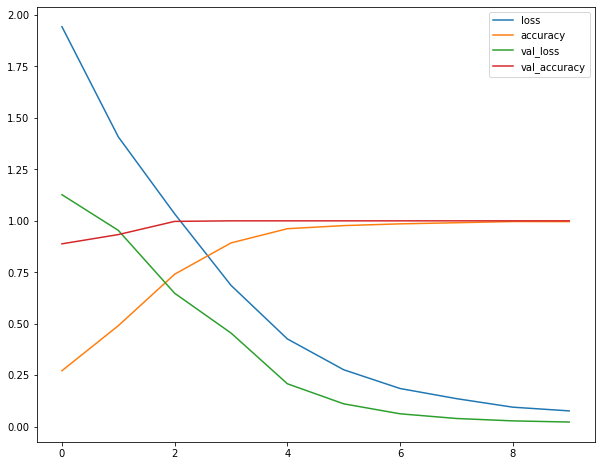

In [34]:
pd.DataFrame(history2.history).plot(figsize=(10,8))
plt.show()

In [36]:
model3 = keras.models.Sequential([
  keras.layers.Conv2D(30,kernel_size=(5,5),activation='relu',input_shape=(100,100,3)),
  keras.layers.MaxPool2D(4,4),
  keras.layers.BatchNormalization(),
  keras.layers.Flatten() ,    
  keras.layers.Dense(10,activation='relu') ,  
  keras.layers.BatchNormalization(),      
  keras.layers.Dropout(rate=0.5) ,            
  keras.layers.Dense(5,activation='softmax') ,    
  ])

model3.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history3 = model3.fit(xtrain_gen, epochs=5, batch_size=20, verbose=1, validation_data= xtest_gen)

Epoch 1/5
92/92 [==============================] - 12s 111ms/step - loss: 1.9451 - accuracy: 0.2936 - val_loss: 1.1325 - val_accuracy: 0.9905
Epoch 2/5
92/92 [==============================] - 10s 109ms/step - loss: 1.4476 - accuracy: 0.5044 - val_loss: 0.8576 - val_accuracy: 0.9959
Epoch 3/5
92/92 [==============================] - 9s 93ms/step - loss: 1.0875 - accuracy: 0.7033 - val_loss: 0.7257 - val_accuracy: 1.0000
Epoch 4/5
92/92 [==============================] - 10s 107ms/step - loss: 0.7393 - accuracy: 0.8501 - val_loss: 0.3405 - val_accuracy: 1.0000
Epoch 5/5
92/92 [==============================] - 10s 110ms/step - loss: 0.4950 - accuracy: 0.9264 - val_loss: 0.4506 - val_accuracy: 0.9946


In [37]:
loss, accuracy = model3.evaluate(x_test, y_test)

print(f'Test Loss is {loss}')
print(f'Test Accuracy is {accuracy}')

23/23 [==============================] - 0s 5ms/step - loss: 0.4715 - accuracy: 0.9932
Test Loss is 0.4714769124984741
Test Accuracy is 0.9931880235671997


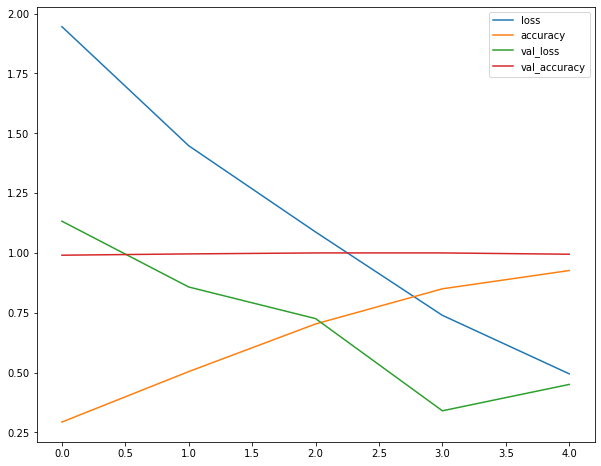

In [38]:
pd.DataFrame(history3.history).plot(figsize=(10,8))
plt.show()

In [39]:
prediction = model3.predict(x_test)

23/23 [==============================] - 0s 4ms/step


In [40]:
pred = []
for p in prediction:
  p = np.argmax(p)
  pred.append(p)
pred = np.array(pred)

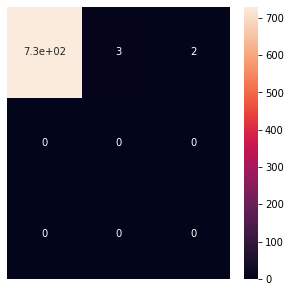

In [42]:
plt.figure(figsize=(5, 5))
plt.axis('off')
sns.heatmap(confusion_matrix(y_test, pred), annot=True)
plt.show()

In [43]:
# print(classification_report(y_test, pred))
accuracy_score(y_test, pred)

0.9931880108991825

In [44]:
pred[0], label_dict

(0, {'tulips': 0, 'sunflowers': 1, 'dandelion': 2, 'daisy': 3, 'roses': 4})

In [45]:
list(label_dict.keys())[list(label_dict.values()).index(0)]

'tulips'

In [46]:
temp = list(zip(x_test, pred))
random.shuffle(temp)
res1, res2 = zip(*temp)
res1, res2 = list(res1), list(res2)

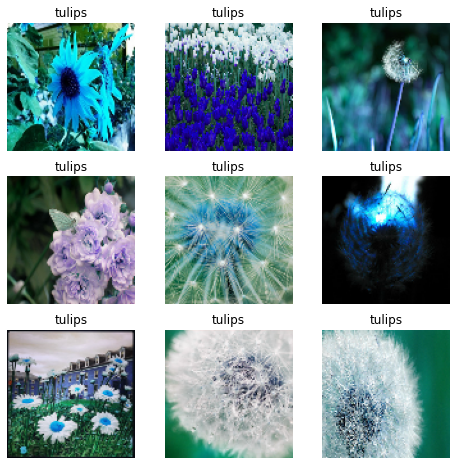

In [47]:
plt.figure(figsize=(8,8))
for n , i in enumerate(list(np.random.randint(0,len(res1),9))) : 
    plt.subplot(3,3,n+1)
    plt.imshow(res1[i])   
    plt.axis('off')
    plt.title(list(label_dict.keys())[list(label_dict.values()).index(res2[i])])

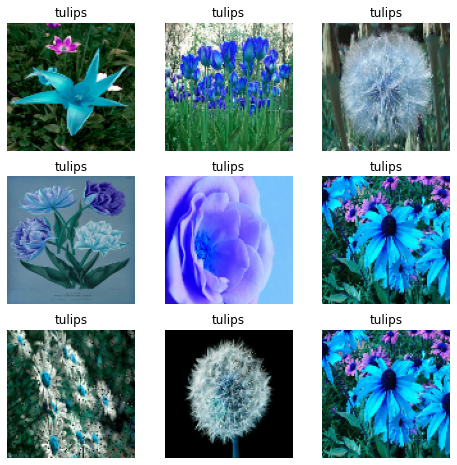

In [48]:
plt.figure(figsize=(8,8))
for n , i in enumerate(list(np.random.randint(0,len(x_test),9))) : 
    plt.subplot(3,3,n+1)
    plt.imshow(x_test[i])   
    plt.axis('off')
    plt.title(list(label_dict.keys())[list(label_dict.values()).index(pred[i])])

In [ ]:
for k in images_dict.keys():
  print(images_dict[k][0], len(images_dict[k][1]))